In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(100, 100, 3))

In [8]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/arnav/anaconda3/envs/deeplearning/Getting started with deep learning/dogs_vs_cats/dataset'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

datagen = ImageDataGenerator(rescale=1/255)
batch_size=8

def extract_features(dir, sample_count) :
    features = np.zeros(shape=(sample_count, 3, 3, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
    dir,
    target_size = (100, 100),
    batch_size = batch_size,
    class_mode='binary')
    
    i=0
    for inputs_batch, labels_batch in generator :
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i+=1
        if i*batch_size >= sample_count :
            break
    return features, labels

In [9]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
train_features = np.reshape(train_features, (2000, 3*3*512))
validation_features = np.reshape(validation_features, (1000, 3*3*512))
test_features = np.reshape(test_features, (1000, 3*3*512))

In [15]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=3*3*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [16]:
history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 0s 5ms/step - loss: 0.6877 - acc: 0.6055 - val_loss: 0.5233 - val_acc: 0.7680
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.5297 - acc: 0.7365 - val_loss: 0.4568 - val_acc: 0.7950
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4743 - acc: 0.7740 - val_loss: 0.4268 - val_acc: 0.8130
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4370 - acc: 0.7960 - val_loss: 0.4164 - val_acc: 0.8100
Epoch 5/30
100/100 [==============================] - 1s 7ms/step - loss: 0.3918 - acc: 0.8280 - val_loss: 0.3947 - val_acc: 0.8180
Epoch 6/30
100/100 [==============================] - 1s 8ms/step - loss: 0.3873 - acc: 0.8250 - val_loss: 0.3887 - val_acc: 0.8210
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3637 - acc: 0.8435 - val_loss: 0.3777 - val_acc: 0.8260
Epoch 8/30
100/100 [==============================] - 1s 9ms/step - loss: 0.

In [17]:
model.save('cats_and_dogs_small_3.h5')

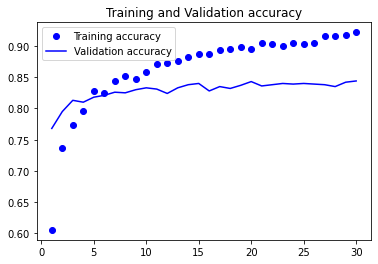

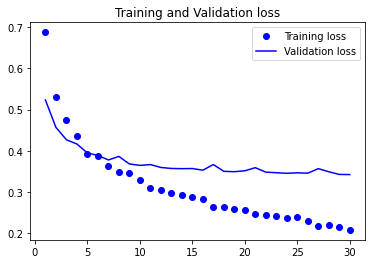

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.legend()

plt.show()